<a href="https://colab.research.google.com/github/omeromergiladi/machine_learning/blob/main/heart_desease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
import csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.head(200)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0


In [ ]:
#lets check where there are empty cells in 'thal' column
for i in range(0, 303):
  print(df['thal'][i])
  

1
2
2
2
2
1
2
3
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
0
2
2
2
3
2
2
2
2
2
2
2
2
3
1
1
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
3
2
2
2
3
2
3
3
3
2
2
2
3
2
2
2
3
2
3
2
2
2
3
2
3
2
2
2
2
2
2
2
3
3
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
3
2
2
2
2
2
2
2
2
2
2
1
2
3
2
2
2
2
2
3
3
2
2
2
2
2
2
3
2
3
3
1
3
2
3
3
3
3
2
3
1
3
3
2
3
3
2
3
3
3
3
3
3
3
3
2
3
2
3
3
1
2
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
2
3
3
2
2
3
3
3
2
3
3
2
1
3
1
3
3
1
3
3
3
3
2
2
2
3
3
3
2
3
3
2
3
2
2
2
2
2
2
3
3
2
2
3
2
3
3
3
2
2
1
0
1
3
3
3
2
2
3
3
3
1
1
3
1
3
2
1
3
3
3
3
2
303


In [ ]:
for i in range(0, 303):

  print(df['ca'][i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
2
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
3
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
2
0
4
1
0
0
0
3
1
3
2
0
2
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
2
0
0
1
0
0
0
0
0
0
1
0
0
0
0
4
0
0
0
0
4
4
3
2
2
1
0
1
0
0
2
2
0
2
0
0
1
1
3
0
1
0
1
1
1
1
0
0
3
1
2
0
0
0
2
2
2
1
1
0
0
3
1
1
2
3
1
1
1
0
0
1
0
1
3
1
2
3
0
1
2
1
0
1
0
0
0
0
3
1
1
3
0
2
2
3
0
1
0
2
1
1
0
2
3
1
3
3
4
3
2
0
3
2
0
0
0
2
1
2
2
1
1
0
3
2
0
0
2
0
1
1
2
1
0
2
1
0
0
1
0
1
2
2
1
1
1
1
3
2
0
0
2
0
2
0
0
2
1
1


As we see in 'thal' column there are no empty cells, also in 'ca' column there are no empty cells.

DATA ANALYSIS

Text(0.5, 1.0, 'histogram of chol rate for sick people')

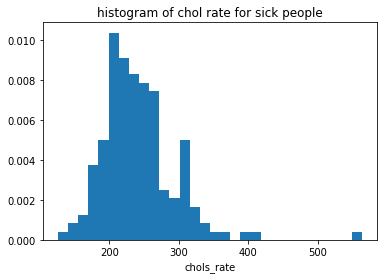

In [ ]:
chols_of_sick = []   #chols level of sick people
chols_of_health = [] #..........................

for i in range(0,303):

  if df['target'][i] == 1:
    
    chols_of_sick.append(float(df['chol'][i]))

  else:

    chols_of_health.append(float(df['chol'][i]))

plt.hist(chols_of_sick, density = True, bins = 30)
plt.xlabel('chols_rate')
plt.title('histogram of chol rate for sick people')


Text(0.5, 1.0, 'histogrsm of chol of healthy people')

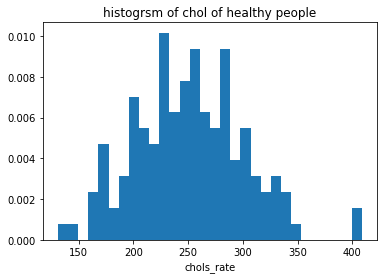

In [ ]:
plt.hist(chols_of_health, density = True, bins = 30)
plt.xlabel('chols_rate')
plt.title('histogrsm of chol of healthy people')

No handles with labels found to put in legend.


[0, 0, 0, 0, 2, 2, 0, 2, 2, 3, 1, 9, 7, 5, 8, 6, 4, 3, 4, 3, 4, 9, 9, 6, 10, 3, 5, 7, 7, 5, 3, 1, 4, 3, 6, 4, 4, 3, 2, 2, 1]


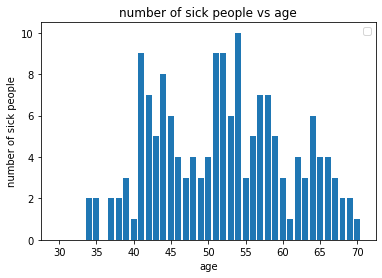

In [ ]:
ages = [i for i in range(30, 71)]
number_of_sick_according_to_age = [] 

for i in ages:

  filtered_df = df[(df['age'] == i) & (df['target'] == 1)]
  number_of_sick_according_to_age.append(len(filtered_df.index))

print(number_of_sick_according_to_age)
#show number of sick people in each age
#ages vs number_of_sick_according_to_age 
plt.title('number of sick people vs age')
plt.xlabel('age')
plt.ylabel('number of sick people')
plt.bar(ages, number_of_sick_according_to_age)
plt.legend()


No handles with labels found to put in legend.


[0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 1, 3, 3, 2, 3, 2, 3, 2, 3, 3, 4, 2, 6, 5, 6, 10, 12, 9, 8, 7, 7, 6, 4, 4, 3, 6, 2, 1, 3]


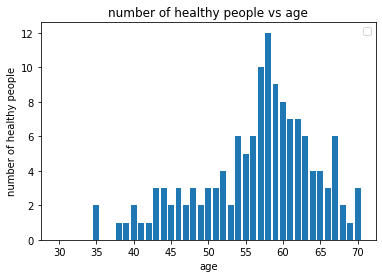

In [ ]:
number_of_healthy_according_to_age = []

for i in ages:

  filtered_df = df[(df['age'] == i) & (df['target'] == 0)]
  number_of_healthy_according_to_age.append(len(filtered_df.index))

print(number_of_healthy_according_to_age)

plt.title('number of healthy people vs age')
plt.xlabel('age')
plt.ylabel('number of healthy people')
plt.bar(ages, number_of_healthy_according_to_age)
plt.legend()


In [ ]:
df_as_numpy_array = df.to_numpy()
print(df_as_numpy_array)

[[63.  1.  3. ...  0.  1.  1.]
 [37.  1.  2. ...  0.  2.  1.]
 [41.  0.  1. ...  0.  2.  1.]
 ...
 [68.  1.  0. ...  2.  3.  0.]
 [57.  1.  0. ...  1.  3.  0.]
 [57.  0.  1. ...  1.  2.  0.]]


In [ ]:
print(shape(df_as_numpy_array))
X = df_as_numpy_array[:, 0:13]
Y = df_as_numpy_array[:, 13]

Y = np.array([int(i) for i in Y])   #convert the labels to int
print(len(Y))

(303, 14)
303


In [ ]:
#scaling the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
#split the data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)   #n_neighbors is K
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  7]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [ ]:
error = []

for i in range(1, 40):

  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(x_train, y_train)
  pred_i = classifier.predict(x_test)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

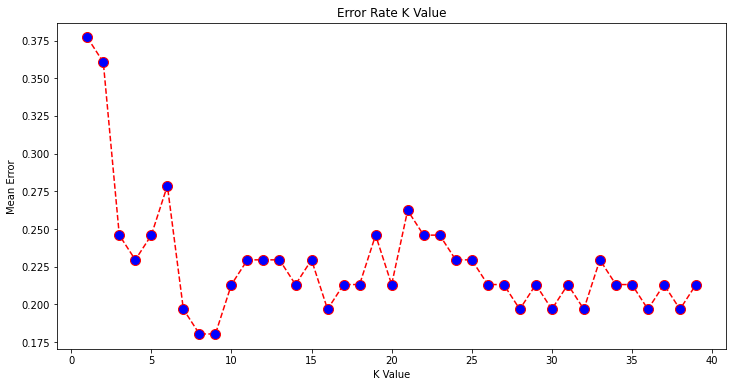

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color = 'red', linestyle='dashed', marker = 'o', markerfacecolor = 'blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

We can see from the graph that k = 9 gives the lowest Mean Error.